# Machine Learning Model

In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sb
import numpy as np
import pandas as pd
import os

### 1. Clean & Prepare Dataset

In [2]:
# Read csv into dataframe and drop id column
train_data = pd.read_csv(os.path.join("Resources", "customer_data.csv"))

# create a reponse discription column with discriptions
train_data["Response_Discription"] = train_data["Response"].replace({0: "0 - Not Interested", 1: "1 - Interested"})
train_data["DL_Discription"] = train_data["Driving_License"].replace({0: "0 - No Driving License", 1: "1 - Driving License"})

train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Response_Discription,DL_Discription
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,1 - Interested,1 - Driving License
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,0 - Not Interested,1 - Driving License
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,1 - Interested,1 - Driving License
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0 - Not Interested,1 - Driving License
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0 - Not Interested,1 - Driving License


In [3]:
train_data.shape

(381109, 14)

In [4]:
# check for nulls
train_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
Response_Discription    0
DL_Discription          0
dtype: int64

In [5]:
train_data.count()

id                      381109
Gender                  381109
Age                     381109
Driving_License         381109
Region_Code             381109
Previously_Insured      381109
Vehicle_Age             381109
Vehicle_Damage          381109
Annual_Premium          381109
Policy_Sales_Channel    381109
Vintage                 381109
Response                381109
Response_Discription    381109
DL_Discription          381109
dtype: int64

In [6]:
train_data.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
Response_Discription     object
DL_Discription           object
dtype: object

# EDA

In [7]:
train_data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# Response

In [8]:
# get reponse counts
response_cnts = train_data.Response_Discription.value_counts()
response_cnts

0 - Not Interested    334399
1 - Interested         46710
Name: Response_Discription, dtype: int64

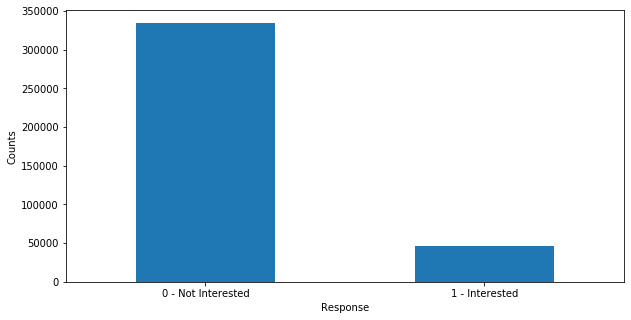

In [9]:
# plot response counts
response_cnts.plot(kind="bar", rot = 0, figsize=(10,5))
plt.xlabel('Response')
plt.ylabel('Counts')

plt.savefig('images/response_bar')

# Gender Responses

In [10]:
# transpose data
gender_pivot = train_data.pivot_table(index=["Gender"],columns=["Response_Discription"],values="id",aggfunc='count')
gender_pivot

Response_Discription,0 - Not Interested,1 - Interested
Gender,,
Female,156835,18185
Male,177564,28525


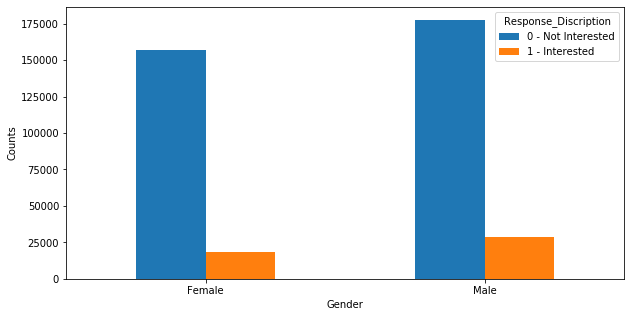

In [11]:
# plot gender bar chart
gender_pivot.plot(kind="bar", rot = 0, figsize=(10,5))
plt.ylabel('Counts')

plt.savefig('images/gender_bar')

# Age Group Responses

In [12]:
# Create the decade bins 
bins = [0, 30, 40, 50, 60, 70, 100]

# Create the names for the bins
group_names = ["20 to 29", "30 to 39", "40 to 49", "50 to 59", "60 to 69", "70+"]

# add bin column to dataframe
train_data["Age_Group"] = pd.cut(train_data["Age"], bins, labels=group_names, include_lowest=True)

age_pivot = train_data.pivot_table(index=["Age_Group"], columns=["Response_Discription"],values="id",aggfunc='count')

age_pivot

Response_Discription,0 - Not Interested,1 - Interested
Age_Group,,
20 to 29,154278,7183
30 to 39,43566,11597
40 to 49,59916,16025
50 to 59,37589,7716
60 to 69,24795,3043
70+,14255,1146


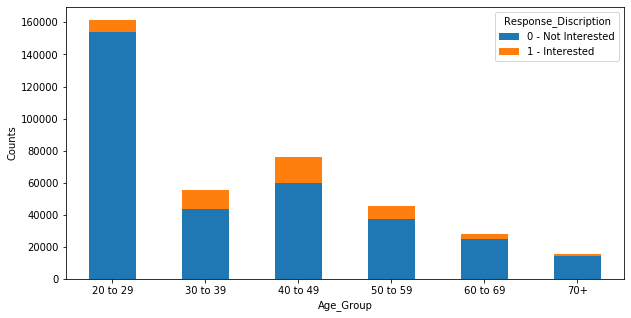

In [13]:
age_pivot.plot(kind="bar", rot=0, stacked=True, figsize=(10,5))
plt.ylabel('Counts')

plt.savefig('images/age_stackedbar')

# Driving License Responses

In [14]:
# DL reponses counts
dl_pivot = train_data.pivot_table(index=["DL_Discription"], columns=["Response_Discription"],values="id",aggfunc='count')
dl_pivot

Response_Discription,0 - Not Interested,1 - Interested
DL_Discription,,
0 - No Driving License,771,41
1 - Driving License,333628,46669


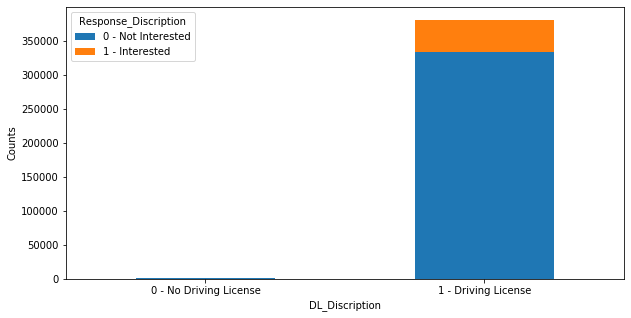

In [15]:
dl_pivot.plot.bar(rot = 0, stacked=True, figsize=(10,5))
plt.ylabel('Counts')

plt.savefig('images/dl_stackedbar')

# Previouisly Insured Responses

In [16]:
pi_pivot = train_data.pivot_table(index=["Previously_Insured"], columns=["Response_Discription"],values="id", aggfunc='count').reset_index().rename_axis(None, axis=1)
pi_pivot["Previously_Insured"] = pi_pivot["Previously_Insured"].replace({0: 'No', 1: 'Yes'})
pi_df = pi_pivot.set_index('Previously_Insured')
pi_df

,0 - Not Interested,1 - Interested
Previously_Insured,,
No,159929,46552
Yes,174470,158


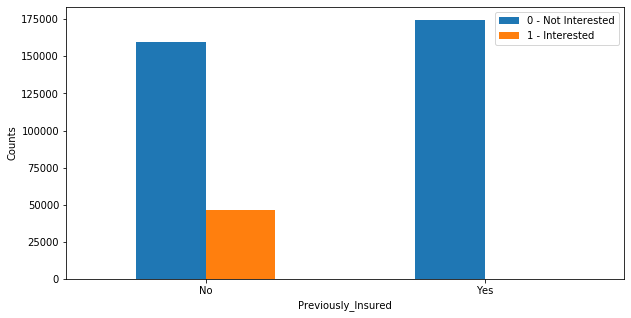

In [17]:
pi_df.plot(kind="bar", rot=0, figsize=(10,5))
plt.ylabel('Counts')

plt.savefig('images/previously_insured_bar')

# Vehicle Age Responses

In [18]:
#car_age_cnt = df.groupby(["Response","Vehicle_Age"])["id"].count().to_frame().rename(columns={"id": "results"}).reset_index()
car_age_pivot = train_data.pivot_table(index=["Vehicle_Age"], columns=["Response_Discription"],values="id", aggfunc='count')
car_age_pivot

Response_Discription,0 - Not Interested,1 - Interested
Vehicle_Age,,
1-2 Year,165510,34806
< 1 Year,157584,7202
> 2 Years,11305,4702


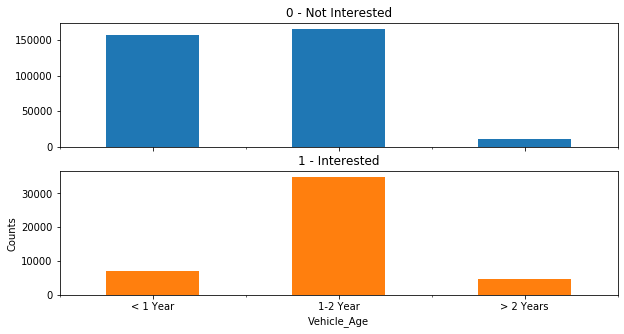

In [19]:
car_age_pivot.reindex(["< 1 Year","1-2 Year","> 2 Years"]).plot.bar(rot = 0, subplots=True, figsize=(10,5), legend=False)
plt.ylabel('Counts')

plt.savefig('images/vehicle_age_subplots')

# Annual Premiun

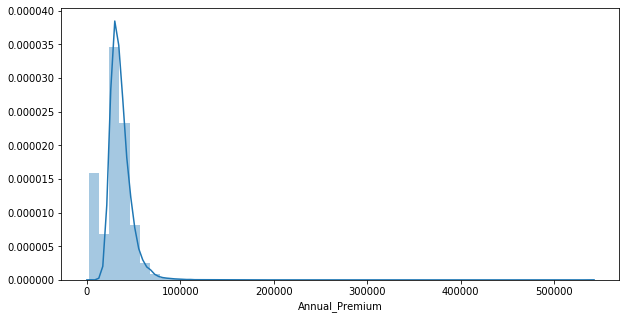

In [25]:
plt.figure(figsize = (10, 5))

sb.distplot(train_data['Annual_Premium'])

plt.savefig('images/annual_premium_dist')

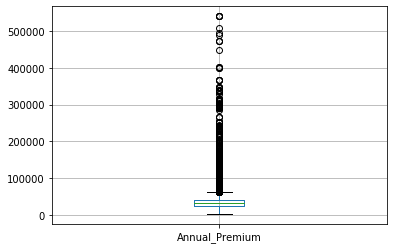

In [24]:
ap = train_data['Annual_Premium']
ap_df = pd.DataFrame(ap)
ap_df.boxplot()
plt.savefig('images/annual_premium_boxplot')

# Vintage Responses

In [22]:
# Create the decade bins 
bins = [0, 90, 183, 500]

# Create the names for the bins
group_names = ["Under 90 Days", "3 to 6 Months", "Over 6 Months"]

# add bin column to dataframe
train_data["Vintage_Group"] = pd.cut(train_data["Vintage"], bins, labels=group_names, include_lowest=True)

# reorganize columns
vintage_df = train_data[['Vintage', 'Vintage_Group', 'Response_Discription','id']]
vintage_df.head()

,Vintage,Vintage_Group,Response_Discription,id
0,217,Over 6 Months,1 - Interested,1
1,183,3 to 6 Months,0 - Not Interested,2
2,27,Under 90 Days,1 - Interested,3
3,203,Over 6 Months,0 - Not Interested,4
4,39,Under 90 Days,0 - Not Interested,5


In [23]:
vintage_pivot = vintage_df.pivot_table(index=["Vintage_Group"], columns=["Response_Discription"],values="id", aggfunc='count')
vintage_pivot

Response_Discription,0 - Not Interested,1 - Interested
Vintage_Group,,
Under 90 Days,93522,13134
3 to 6 Months,107203,14898
Over 6 Months,133674,18678


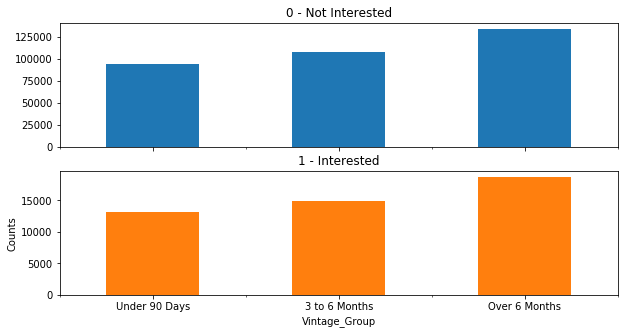

In [24]:
vintage_pivot.plot.bar(rot = 0, subplots=True, figsize=(10,5), legend=False)
plt.ylabel('Counts')

plt.savefig('images/vintage_subplots')

# Vintage vs. Annual Premium Scatter

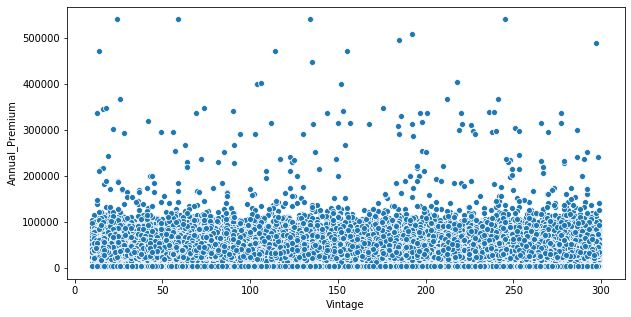

In [25]:
plt.subplots(figsize=(10, 5))

sb.scatterplot(x=train_data['Vintage'],y=train_data['Annual_Premium'])

plt.savefig('images/vintage_annual_premium_scatter')

In [26]:
# Correlation Matrix

In [27]:
corr_df = train_data.drop(columns={'id', 'Age_Group', 'Response_Discription','DL_Discription', 'Vintage_Group'})

corr_df["Gender"] = corr_df["Gender"].replace({'Male': 1, 'Female': 0})

corr_df["Vehicle_Age"] = corr_df["Vehicle_Age"].replace({'> 2 Years': 2, '1-2 Year': 1, '< 1 Year': 0})

corr_df["Vehicle_Damage"] = corr_df["Vehicle_Damage"].replace({'Yes': 1, 'No': 0})

corr_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,0,0,27496.0,152.0,39,0


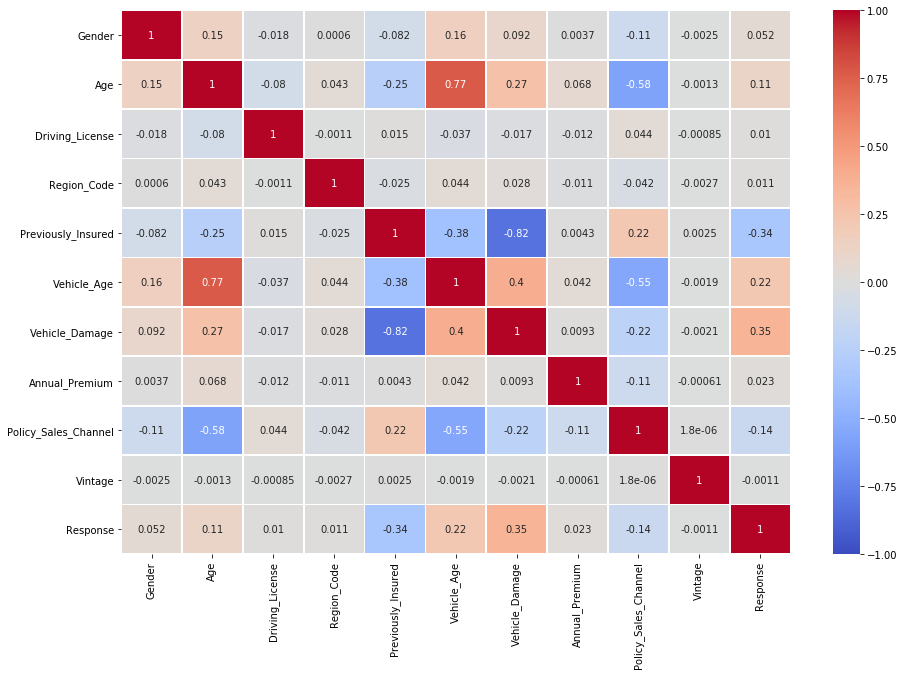

In [28]:
f, ax = plt.subplots(figsize=(15, 10))

sb.heatmap(corr_df.corr(), vmin=-1, vmax=1, center= 0, cmap='coolwarm', linewidths=0.75, annot=True)

plt.savefig('images/corr_matrix')